<a href="https://colab.research.google.com/github/mehrnazeraeisi/KnnClassifier_Result/blob/main/MagicTelescope_43971.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#   مشاهده نمودارها برای هر درصد دلخواه
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def evaluate_knn_on_dataset(X_data, y_data, test_size=0.2, n_repeats=20):
    # مرحله 1: محاسبه Accuracy برای تک‌ویژگی‌ها
    def compute_acc_per_feature(X, y):
        feature_scores = []
        for feature in X.columns:
            model = KNeighborsClassifier()
            model.fit(X[[feature]], y)
            y_pred = model.predict(X[[feature]])
            acc=accuracy_score(y, y_pred)
            feature_scores.append((feature, acc))
        df_scores = pd.DataFrame(feature_scores, columns=['Feature', 'Accuracy'])
        return df_scores.sort_values(by='Accuracy', ascending=False)

    # مرحله 2: بررسی گروه‌های افزایشی ویژگی‌ها
    def evaluate_incremental_feature_groups(X, y, sorted_features):
        results = []
        best_acc = -np.inf
        best_group = []
        for k in range(1, len(sorted_features) + 1):
            group = sorted_features[:k]
            model = KNeighborsClassifier()
            model.fit(X[group], y)
            y_pred = model.predict(X[group])
            acc=accuracy_score(y, y_pred)
            results.append((k, acc))
            if acc > best_acc:
                best_acc = acc
                best_group = group
        # اضافه کردن All Features به لیست
        model.fit(X, y)
        y_pred = model.predict(X)
        all_acc = accuracy_score(y, y_pred)
        results.append(("All Features", all_acc))
        return pd.DataFrame(results, columns=["Group Size", "Accuracy"]), best_group

    # اجرای مراحل
    single_feat_df = compute_acc_per_feature(X_data, y_data)
    sorted_features = single_feat_df['Feature'].tolist()
    group_results_df, best_group = evaluate_incremental_feature_groups(X_data, y_data, sorted_features)

    # مرحله 3: چاپ نتایج اولیه
    print("📌 نتایج Accuracy برای هر ویژگی:")
    print(single_feat_df.to_string(index=False))

    print("\n📊 نتایج عملکرد گروه‌های افزایشی Accuracy:")
    print(group_results_df.to_string(index=False))

    best_acc = group_results_df[group_results_df["Group Size"] == len(best_group)]["Accuracy"].values[0]

    print("\n🏆 بهترین گروه:")
    print(f"📌 تعداد ویژگی‌ها: {len(best_group)}")
    print(f"🔹 Accuracy: {best_acc:.4f}")

    # مرحله 4: ارزیابی نهایی با Split و رسم نمودار
    acc_scores = {"all_features": [], "best_group": []}

    feature_groups = {
        "all_features": X_data.columns.tolist(),
        "best_group": best_group
    }

    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)
        for group_name, group_features in feature_groups.items():
            model = KNeighborsClassifier()
            model.fit(X_train[group_features], y_train)
            y_pred = model.predict(X_test[group_features])
            acc_scores[group_name].append(accuracy_score(y_test, y_pred))

    # رسم نمودار Accuracy
    x = np.arange(1, n_repeats + 1)
    plt.figure(figsize=(8, 4))
    for name, acc in acc_scores.items():
        plt.plot(x, acc, label=f"{name.replace('_', ' ').title()} Accuracy", marker='o')
    plt.xlabel("Repeat")
    plt.ylabel("Accuracy")
    plt.title("KNN Classifier Accuracy Performance")
    plt.legend()
    plt.grid(True)
    plt.show()


    # چاپ نتایج نهایی میانگین
    print("\n📈 میانگین نتایج پس از تکرار:")
    for name in feature_groups:
        avg_acc = np.mean(acc_scores[name])
        print(f"{name.replace('_', ' ').title()} → Accuracy: {avg_acc:.4f}")


In [14]:
!pip install openml

In [21]:
#echocardiogram-uci
#
import openml
import pandas as pd

# دانلود دیتاست
dataset = openml.datasets.get_dataset(43971)
data, y_data, _, _ = dataset.get_data(target=dataset.default_target_attribute)
print(data.shape)
# افزودن ستون هدف به دیتافریم کامل
data['rating'] = y_data  # فرض بر این است که ستون هدف، rating است

print("قبل از حذف NaN و ستون:", data.shape)

# حذف سطرهای دارای NaN
data = data.dropna()

# حذف ستون خاص (در صورت وجود آن)
if 'Accident_Index' in data.columns:
    data = data.drop('Accident_Index', axis=1)
    print("ستون Accident_Index حذف شد.")

# بررسی ستون‌ها و شکل نهایی
print(data.columns)
print(data.head())
print("بعد از حذف:", data.shape)

# جدا کردن ویژگی‌ها و برچسب‌ها
X_data = data.drop('rating', axis=1)
y_data = data['rating']

print(X_data.head() )  # ویژگی‌ها
print(f"\nهدف")
print(y_data.head())
print(f"\nسایز دیتاست")
print(X_data.shape)



(13376, 10)
قبل از حذف NaN و ستون: (13376, 11)
Index(['fLength:', 'fWidth:', 'fSize:', 'fConc:', 'fConc1:', 'fAsym:',
       'fM3Long:', 'fM3Trans:', 'fAlpha:', 'fDist:', 'rating'],
      dtype='object')
   fLength:  fWidth:  fSize:  fConc:  fConc1:   fAsym:  fM3Long:  fM3Trans:  \
0   69.2979  26.8809  3.1930  0.2065   0.1074  39.6296   44.3457   -23.0604   
1   24.5939  10.1418  2.5676  0.5007   0.2693  -8.4503   15.2452    -7.0283   
2   55.4800  27.1606  3.1826  0.2299   0.1225  43.1016   54.2556    13.7406   
3   12.6594  11.7413  2.1351  0.7033   0.3846 -15.8596    9.4522    -8.7126   
4   38.6204  20.5632  2.9770  0.2478   0.1270 -13.8229  -31.3983   -13.1337   

   fAlpha:   fDist: rating  
0   9.3234  248.750      g  
1  17.0056  173.288      g  
2  32.2220  262.181      g  
3  43.5434  227.711      g  
4   5.8671  192.467      g  
بعد از حذف: (13376, 11)
   fLength:  fWidth:  fSize:  fConc:  fConc1:   fAsym:  fM3Long:  fM3Trans:  \
0   69.2979  26.8809  3.1930  0.2065   0.107

📌 نتایج Accuracy برای هر ویژگی:
  Feature  Accuracy
  fAlpha:  0.777437
  fWidth:  0.744169
 fM3Long:  0.733104
 fLength:  0.732207
fM3Trans:  0.724806
   fAsym:  0.718376
   fDist:  0.698340
   fConc:  0.696471
   fSize:  0.689145
  fConc1:  0.682566

📊 نتایج عملکرد گروه‌های افزایشی Accuracy:
  Group Size  Accuracy
           1  0.777437
           2  0.809958
           3  0.835676
           4  0.853917
           5  0.853170
           6  0.845769
           7  0.843526
           8  0.843451
           9  0.843675
          10  0.843675
All Features  0.843675

🏆 بهترین گروه:
📌 تعداد ویژگی‌ها: 4
🔹 Accuracy: 0.8539


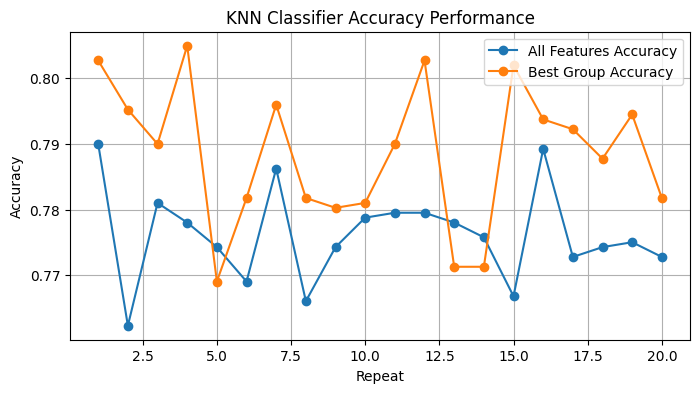


📈 میانگین نتایج پس از تکرار:
All Features → Accuracy: 0.7762
Best Group → Accuracy: 0.7885


In [23]:
# اجرای ارزیابی مدل (تابع فرضی شما)
evaluate_knn_on_dataset(X_data, y_data, test_size=0.1, n_repeats=20)

📌 نتایج Accuracy برای هر ویژگی:
  Feature  Accuracy
  fAlpha:  0.777437
  fWidth:  0.744169
 fM3Long:  0.733104
 fLength:  0.732207
fM3Trans:  0.724806
   fAsym:  0.718376
   fDist:  0.698340
   fConc:  0.696471
   fSize:  0.689145
  fConc1:  0.682566

📊 نتایج عملکرد گروه‌های افزایشی Accuracy:
  Group Size  Accuracy
           1  0.777437
           2  0.809958
           3  0.835676
           4  0.853917
           5  0.853170
           6  0.845769
           7  0.843526
           8  0.843451
           9  0.843675
          10  0.843675
All Features  0.843675

🏆 بهترین گروه:
📌 تعداد ویژگی‌ها: 4
🔹 Accuracy: 0.8539


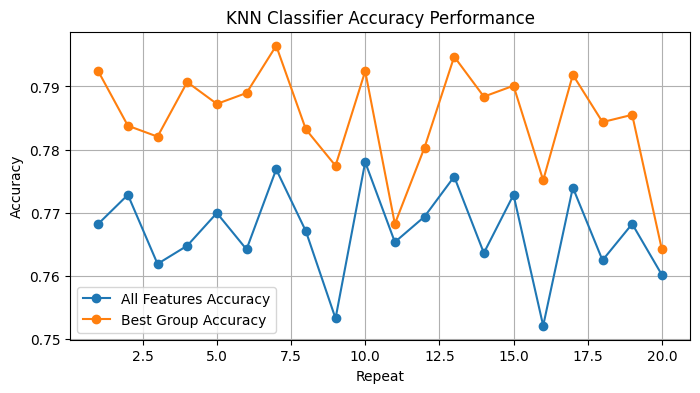


📈 میانگین نتایج پس از تکرار:
All Features → Accuracy: 0.7671
Best Group → Accuracy: 0.7849


In [24]:
# اجرای ارزیابی مدل (تابع فرضی شما)
evaluate_knn_on_dataset(X_data, y_data, test_size=0.13, n_repeats=20)

📌 نتایج Accuracy برای هر ویژگی:
  Feature  Accuracy
  fAlpha:  0.777437
  fWidth:  0.744169
 fM3Long:  0.733104
 fLength:  0.732207
fM3Trans:  0.724806
   fAsym:  0.718376
   fDist:  0.698340
   fConc:  0.696471
   fSize:  0.689145
  fConc1:  0.682566

📊 نتایج عملکرد گروه‌های افزایشی Accuracy:
  Group Size  Accuracy
           1  0.777437
           2  0.809958
           3  0.835676
           4  0.853917
           5  0.853170
           6  0.845769
           7  0.843526
           8  0.843451
           9  0.843675
          10  0.843675
All Features  0.843675

🏆 بهترین گروه:
📌 تعداد ویژگی‌ها: 4
🔹 Accuracy: 0.8539


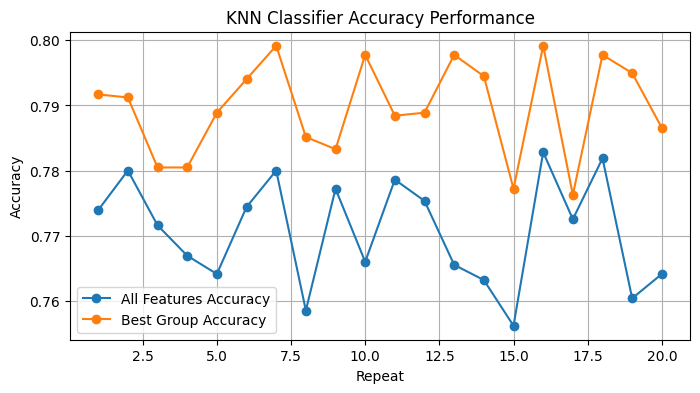


📈 میانگین نتایج پس از تکرار:
All Features → Accuracy: 0.7707
Best Group → Accuracy: 0.7897


In [25]:
# اجرای ارزیابی مدل (تابع فرضی شما)
evaluate_knn_on_dataset(X_data, y_data, test_size=0.16, n_repeats=20)

📌 نتایج Accuracy برای هر ویژگی:
  Feature  Accuracy
  fAlpha:  0.777437
  fWidth:  0.744169
 fM3Long:  0.733104
 fLength:  0.732207
fM3Trans:  0.724806
   fAsym:  0.718376
   fDist:  0.698340
   fConc:  0.696471
   fSize:  0.689145
  fConc1:  0.682566

📊 نتایج عملکرد گروه‌های افزایشی Accuracy:
  Group Size  Accuracy
           1  0.777437
           2  0.809958
           3  0.835676
           4  0.853917
           5  0.853170
           6  0.845769
           7  0.843526
           8  0.843451
           9  0.843675
          10  0.843675
All Features  0.843675

🏆 بهترین گروه:
📌 تعداد ویژگی‌ها: 4
🔹 Accuracy: 0.8539


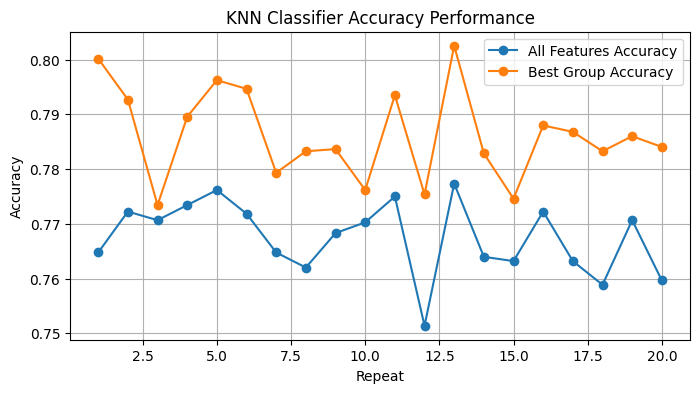


📈 میانگین نتایج پس از تکرار:
All Features → Accuracy: 0.7675
Best Group → Accuracy: 0.7863


In [26]:
# اجرای ارزیابی مدل (تابع فرضی شما)
evaluate_knn_on_dataset(X_data, y_data, test_size=0.19, n_repeats=20)

📌 نتایج Accuracy برای هر ویژگی:
  Feature  Accuracy
  fAlpha:  0.777437
  fWidth:  0.744169
 fM3Long:  0.733104
 fLength:  0.732207
fM3Trans:  0.724806
   fAsym:  0.718376
   fDist:  0.698340
   fConc:  0.696471
   fSize:  0.689145
  fConc1:  0.682566

📊 نتایج عملکرد گروه‌های افزایشی Accuracy:
  Group Size  Accuracy
           1  0.777437
           2  0.809958
           3  0.835676
           4  0.853917
           5  0.853170
           6  0.845769
           7  0.843526
           8  0.843451
           9  0.843675
          10  0.843675
All Features  0.843675

🏆 بهترین گروه:
📌 تعداد ویژگی‌ها: 4
🔹 Accuracy: 0.8539


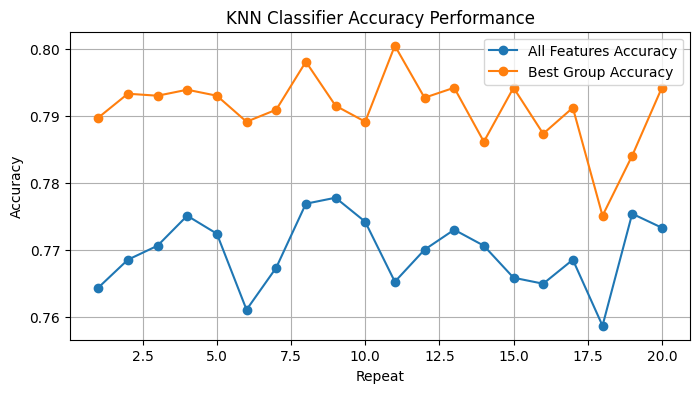


📈 میانگین نتایج پس از تکرار:
All Features → Accuracy: 0.7697
Best Group → Accuracy: 0.7911


In [27]:
# اجرای ارزیابی مدل (تابع فرضی شما)
evaluate_knn_on_dataset(X_data, y_data, test_size=0.25, n_repeats=20)

📌 نتایج Accuracy برای هر ویژگی:
  Feature  Accuracy
  fAlpha:  0.777437
  fWidth:  0.744169
 fM3Long:  0.733104
 fLength:  0.732207
fM3Trans:  0.724806
   fAsym:  0.718376
   fDist:  0.698340
   fConc:  0.696471
   fSize:  0.689145
  fConc1:  0.682566

📊 نتایج عملکرد گروه‌های افزایشی Accuracy:
  Group Size  Accuracy
           1  0.777437
           2  0.809958
           3  0.835676
           4  0.853917
           5  0.853170
           6  0.845769
           7  0.843526
           8  0.843451
           9  0.843675
          10  0.843675
All Features  0.843675

🏆 بهترین گروه:
📌 تعداد ویژگی‌ها: 4
🔹 Accuracy: 0.8539


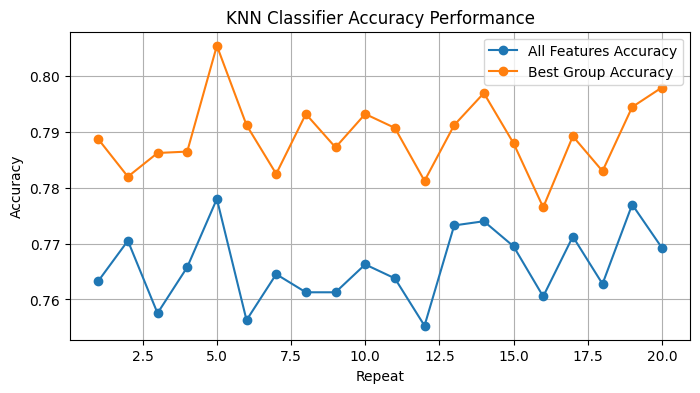


📈 میانگین نتایج پس از تکرار:
All Features → Accuracy: 0.7661
Best Group → Accuracy: 0.7892


In [28]:
# اجرای ارزیابی مدل (تابع فرضی شما)
evaluate_knn_on_dataset(X_data, y_data, test_size=0.30, n_repeats=20)

In [ ]:
def knn_classification_results_table_from_xy(X_data, y_data, test_sizes=[0.1, 0.13, 0.16, 0.19, 0.25], n_repeats=20):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    import pandas as pd
    import numpy as np

    feature_names = X_data.columns.tolist()

    # مرحله 1: محاسبه دقت (Accuracy) برای هر ویژگی
    scores = []
    for feature in feature_names:
        model = KNeighborsClassifier()
        model.fit(X_data[[feature]], y_data)
        y_pred = model.predict(X_data[[feature]])
        acc = accuracy_score(y_data, y_pred)
        scores.append((feature, acc))

    df_scores = pd.DataFrame(scores, columns=['Feature', 'Accuracy']).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

    # مرحله 2: یافتن بهترین گروه ویژگی‌ها
    best_acc = -np.inf
    best_group = []
    for k in range(1, len(df_scores) + 1):
        group = df_scores['Feature'][:k].tolist()
        model = KNeighborsClassifier()
        model.fit(X_data[group], y_data)
        y_pred = model.predict(X_data[group])
        acc = accuracy_score(y_data, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_group = group

    # مرحله 3: اجرای آزمایش روی چند test size و تکرار
    detailed_results = []
    for ts in test_sizes:
        for repeat in range(1, n_repeats + 1):
            X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=ts)

            # مدل روی همه ویژگی‌ها
            model_all = KNeighborsClassifier()
            model_all.fit(X_train, y_train)
            y_pred_all = model_all.predict(X_test)
            acc_all = accuracy_score(y_test, y_pred_all)

            # مدل روی گروه ویژگی‌های منتخب
            model_best = KNeighborsClassifier()
            model_best.fit(X_train[best_group], y_train)
            y_pred_best = model_best.predict(X_test[best_group])
            acc_best = accuracy_score(y_test, y_pred_best)

            # ذخیره در جدول نتایج
            detailed_results.append({
                'Test Size': ts,
                'Repeat': repeat,
                'All_Accuracy': acc_all,
                'Best_Accuracy': acc_best
            })

    return pd.DataFrame(detailed_results)


In [ ]:

# Climate Model Simulation
# شبیه‌سازی آب‌وهوا (دوتایی)
import openml
import pandas as pd

dataset = openml.datasets.get_dataset(40966)
data, y_data, _, _ = dataset.get_data(target=dataset.default_target_attribute)

data['rating'] = y_data


print(data.shape)
# حذف سطرهای حاوی NaN
data = data.dropna()
print(data.shape)


# 🎯 جدا کردن ویژگی‌ها و برچسب‌ها (مطابق ساختار شما)
X = data.drop('rating', axis=1)
y = data['rating']

# اجرای تابع جدول
df_result = knn_classification_results_table_from_xy(X, y)
print(df_result)


(1080, 78)
(552, 78)
    Test Size  Repeat  All_Accuracy  Best_Accuracy
0        0.10       1      0.946429       0.946429
1        0.10       2      0.946429       1.000000
2        0.10       3      0.964286       0.982143
3        0.10       4      0.982143       1.000000
4        0.10       5      0.928571       1.000000
..        ...     ...           ...            ...
95       0.25      16      0.898551       0.971014
96       0.25      17      0.942029       0.985507
97       0.25      18      0.942029       1.000000
98       0.25      19      0.956522       0.978261
99       0.25      20      0.942029       0.956522

[100 rows x 4 columns]
